In [3]:
import numpy as np
import pandas as p
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import colors
# from adjustText import adjust_text
from Bio import SeqIO
from Bio.Seq import Seq
%matplotlib inline

import scipy

from itertools import combinations

sns.set_style('white')
sns.set_style('ticks')
sns.set_color_codes()

from matplotlib import gridspec
from matplotlib.gridspec import GridSpec

import os
import sys

home_dir = '~/Documents/Stanford/Research/EvolvingFront/'
home_dir = os.path.expanduser(home_dir)

tools_path = f'{home_dir}/code/processing/tools/tools.py'
sys.path.append(os.path.dirname(os.path.expanduser(tools_path)))
import tools as tools



# sns.set_style('dark')
# sns.set_style('ticks')
# plt.style.use('dark_background')

In [4]:
from matplotlib.collections import LineCollection

def multiline(xs, ys, c, ax=None, **kwargs):
    """Plot lines with different colorings

    Parameters
    ----------
    xs : iterable container of x coordinates
    ys : iterable container of y coordinates
    c : iterable container of numbers mapped to colormap
    ax (optional): Axes to plot on.
    kwargs (optional): passed to LineCollection

    Notes:
        len(xs) == len(ys) == len(c) is the number of line segments
        len(xs[i]) == len(ys[i]) is the number of points for each line (indexed by i)

    Returns
    -------
    lc : LineCollection instance.
    """

    # find axes
    ax = plt.gca() if ax is None else ax

    # create LineCollection
    segments = [np.column_stack([x, y]) for x, y in zip(xs, ys)]
    lc = LineCollection(segments, **kwargs)

    # set coloring of line segments
    #    Note: I get an error if I pass c as a list here... not sure why.
    lc.set_array(np.asarray(c))

    # add lines to axes and rescale 
    #    Note: adding a collection doesn't autoscalee xlim/ylim
    ax.add_collection(lc)
    ax.autoscale()
    return lc

In [ ]:
condition_properties = {'Evo1D_IRAs':{1:[0,1,4,7,10,13,16,19,22,24],
                                      2:[0,1,4,7,10,13,16,19,22,24]},
                        'Evo1D_TCG':{1:[0,1,4,8,10,13,16,19,22,24],
                                    2:[0,1,4,8,10,13,16,19,22,24]},
                        
                        'Evo2D_Ira1_Mis':{1:[0,1,4,7,10,13,17,21,25],
                                         2:[0,1,4,7,10,13,17,21,25]},
                        'Evo2D_Ira1_Non':{1:[0,1,4,7,10,13,17,21,25],
                                         2:[0,1,4,7,10,13,17,21,25]},
                        
                        'Evo3D_Ira1_Mis':{1:[0,1,4,7,10,14,17,21],
                                         2:[0,1,4,7,10,14,17,21],
                                         3:[0,1,4,7,10,14,17,21]},
                        'Evo3D_Ira1_Non':{1:[0,1,4,7,10,14,17,21],
                                         2:[0,1,4,7,10,14,17,21],
                                         3:[0,1,4,7,10,14,17,21]},
                        
#                         'Evo3D_TCG':{1:[0,1,4,7,10,14,17,21],
#                                          2:[0,1,4,7,10,14,17,21]},               
                       }





n_gens = 8
effective_n = 6 * 10**8 

cov_thresh = 1e5

In [ ]:

mean_fitness_dict = {}

for condition,reps in condition_properties.items():
    if condition in aggeli_conditions:
        this_data = p.read_csv(f'{condition}_counts_curated.csv')
    else:
        this_data = p.read_csv(f'{condition}_counts_curated.csv')

    for rep,timepoints in reps.items():
        
        all_samples = []
        for time in timepoints:
            if time == 0:
                all_samples.append(f'{condition}_0_0_count')
            else:
                all_samples.append(f'{condition}_{rep}_{time}_count')
                
    
        this_data['barcode'] = this_data['fused_bc']

        this_fit_mut = p.read_csv(f'FitMut2_processing/out_fitmut1_thresholded/{condition}_{rep}_MutSeq_Result.csv')

        mean_fitness = this_fit_mut['Mean_Fitness'].values
        mean_fitness = mean_fitness[~np.isnan(mean_fitness)]
        
        mean_fitness_dict[f'{condition}_{rep}'] = mean_fitness

        kappas = this_fit_mut['Kappa_Value'].values
        kappas = kappas[~np.isnan(kappas)]


        mutant_cell_fraction = this_fit_mut['Mutant_Cell_Fraction'].values
        mutant_cell_fraction = mutant_cell_fraction[~np.isnan(mutant_cell_fraction)]

        this_fit_mut = this_fit_mut[['Fitness','Establishment_Time','Error_Fitness','Error_Establishment_Time','Likelihood_Log_Adaptive']]
#         this_fit_mut = this_fit_mut[['Fitness','Establishment_Time','Error_Fitness','Error_Establishment_Time','Probability_Adaptive']]
        this_fit_mut['barcode'] = this_data['barcode']
    #     inference_time = 

    #     if condition == 'Evo2D_Ira1_non':
    #         break
#         adaptive_only = this_fit_mut[this_fit_mut['Probability_Adaptive']>0.5]
        
#         print(f'{condition}_{rep}',len(adaptive_only))
#         sns.histplot(adaptive_only['Fitness'].values,label=f'{condition}_{rep}',kde=True)
#         plt.legend()
#     print(condition)
#     if condition == 'Evo2D_Ira1_Mis':
# #         if rep == 1:
#         break
        
#         fitness_order = np.argsort(this_fit_mut['Fitness'].values)

#         fig,ax = plt.subplots(figsize=(10,4))
#         plt.subplot(1,2,1)
#         these_ts = np.tile(timepoints,this_data[all_samples].shape[0]).reshape(this_data[all_samples].shape)
#         these_freqs = (this_data[all_samples]/np.nansum(this_data[all_samples],axis=0)).values
#         these_freqs = these_freqs[fitness_order,:]

#         lc = multiline(these_ts,these_freqs, 
#                        this_fit_mut['Fitness'].values[fitness_order], cmap='Reds', lw=0.5)

#         axcb = fig.colorbar(lc)
#         axcb.set_label('Fitness')

#         plt.yscale('log')
#         plt.xticks(timepoints,timepoints)

#         plt.subplot(1,2,2)

#         lc = multiline(these_ts,these_freqs, 
#                        this_fit_mut['Establishment_Time'].values[fitness_order], cmap='Blues', lw=0.5)

#         axcb = fig.colorbar(lc)
#         axcb.set_label('Establishment Time')

#         plt.yscale('log')
#         plt.xticks(timepoints,timepoints)

#         plt.tight_layout()
#         plt.savefig(f'figures/{condition}_{rep}_trajectories_fitness_establishment.pdf',bbox_inches='tight')



In [23]:
p.read_csv(f'FitMut2_processing/out_fitmut1_thresholded/{condition}_{rep}_MutSeq_Result.csv')

Fitness  Establishment_Time  Error_Fitness  Error_Establishment_Time  \
0           0.0                 0.0            0.0                       0.0   
1           0.0                 0.0            0.0                       0.0   
2           0.0                 0.0            0.0                       0.0   
3           0.0                 0.0            0.0                       0.0   
4           0.0                 0.0            0.0                       0.0   
...         ...                 ...            ...                       ...   
116657      0.0                 0.0            0.0                       0.0   
116658      0.0                 0.0            0.0                       0.0   
116659      0.0                 0.0            0.0                       0.0   
116660      0.0                 0.0            0.0                       0.0   
116661      0.0                 0.0            0.0                       0.0   

        Likelihood_Log  Likelihood_Log_Adaptive  Likelihood_Log_Neutral  \
0           -10.157948               -30.213813              -20.055865   
1            -8.654683               -39.137749              -30.483065   
2            -8.313189               -45.868336              -37.555147   
3            -9.833195               -29.700631              -19.867436   
4           -11.236692               -33.378045              -22.141353   
...                ...                      ...                     ...   
116657      -18.198175               -38.721415              -20.523241   
116658      -17.252758               -39.820821              -22.568063   
116659      -17.340618               -31.781045              -14.440427   
116660      -16.450242               -35.614438              -19.164196   
116661      -14.685949               -48.470277              -33.784328   

        Mean_Fitness  Kappa_Value  Mutant_Cell_Fraction  Inference_Time  
0           0.006377     2.000000              0.002263      1706.91335  
1           0.003416     1.046648              0.003023             NaN  
2           0.003543     1.456251              0.006733             NaN  
3           0.003071     2.245990              0.015607             NaN  
4           0.012809     0.867186              0.039587             NaN  
...              ...          ...                   ...             ...  
116657           NaN          NaN                   NaN             NaN  
116658           NaN          NaN                   NaN             NaN  
116659           NaN          NaN                   NaN             NaN  
116660           NaN          NaN                   NaN             NaN  
116661           NaN          NaN                   NaN             NaN  

[116662 rows x 11 columns]

In [24]:
this_data

high_diversity_BC            low_diversity_BC  \
0        GAAGCATCGTAAACACTTTTGCTTT  ATCACAATAACTAAACTGATTCTTCA   
1       AACTAAATTACTAATTGCGTTAGAAG  ATCACAATAACTAAACTGATTCTTCA   
2       ATTTAAATTAACAACGTAGTTAAGTC  ATCACAATAACTAAACTGATTCTTCA   
3       ATTTAAAGCTAGAACGTTATTACATC  ATCACAATAACTAAACTGATTCTTCA   
4       CGAGCAAGGTCAAATGTTGTTATTTC  ATCACAATAACTAAACTGATTCTTCA   
...                            ...                         ...   
109531  GAATTAATTAGAAAGGGGATTAAGCG  ATAACAATAACTAAACTGATTATTCT   
109532  TCGGGAAACCGCAACATCCTTTGCTA  ATAACAATAACTAAACTGATTCTTCA   
109533  TCGGGAAACCGCAACATCCTTTGCTA  ATGACAATAACTAAACTGATTCTTCA   
109534  ATCGGAAACTGAAAGGTGGTTCATAA  ATCACAATAACTAAACTGATTCTTCT   
109535  CTCATAACATCAAAAAAAATTCAAAT  ATCACAATAACTAAACTGATTCTTCG   

        Evo3D_Ira1_Non_0_0_count  \
0                            1.0   
1                            2.0   
2                            1.0   
3                            1.0   
4                            1.0   
...                          ...   
109531                       0.0   
109532                       0.0   
109533                       0.0   
109534                       0.0   
109535                       0.0   

                                                 fused_bc  \
0       ATCACAATAACTAAACTGATTCTTCA_GAAGCATCGTAAACACTTT...   
1       ATCACAATAACTAAACTGATTCTTCA_AACTAAATTACTAATTGCG...   
2       ATCACAATAACTAAACTGATTCTTCA_ATTTAAATTAACAACGTAG...   
3       ATCACAATAACTAAACTGATTCTTCA_ATTTAAAGCTAGAACGTTA...   
4       ATCACAATAACTAAACTGATTCTTCA_CGAGCAAGGTCAAATGTTG...   
...                                                   ...   
109531  ATAACAATAACTAAACTGATTATTCT_GAATTAATTAGAAAGGGGA...   
109532  ATAACAATAACTAAACTGATTCTTCA_TCGGGAAACCGCAACATCC...   
109533  ATGACAATAACTAAACTGATTCTTCA_TCGGGAAACCGCAACATCC...   
109534  ATCACAATAACTAAACTGATTCTTCT_ATCGGAAACTGAAAGGTGG...   
109535  ATCACAATAACTAAACTGATTCTTCG_CTCATAACATCAAAAAAAA...   

        Evo3D_Ira1_Non_1_1_count  Evo3D_Ira1_Non_2_1_count  \
0                            0.0                       7.0   
1                            2.0                      12.0   
2                            0.0                       5.0   
3                            0.0                      11.0   
4                            0.0                      15.0   
...                          ...                       ...   
109531                       0.0                       0.0   
109532                       0.0                       0.0   
109533                       0.0                       0.0   
109534                       0.0                       0.0   
109535                       0.0                       0.0   

        Evo3D_Ira1_Non_3_1_count  Evo3D_Ira1_Non_1_4_count  \
0                           23.0                      18.0   
1                           79.0                     120.0   
2                           11.0                      13.0   
3                           20.0                      29.0   
4                           36.0                      26.0   
...                          ...                       ...   
109531                       0.0                       0.0   
109532                       0.0                       0.0   
109533                       0.0                       0.0   
109534                       0.0                       0.0   
109535                       0.0                       0.0   

        Evo3D_Ira1_Non_2_4_count  Evo3D_Ira1_Non_3_4_count  ...  \
0                           11.0                      12.0  ...   
1                           73.0                      81.0  ...   
2                           14.0                      19.0  ...   
3                           19.0                      19.0  ...   
4                           38.0                      75.0  ...   
...                          ...                       ...  ...   
109531                       0.0                       0.0  ...   
109532                       0.0

In [2]:
for condition,reps in condition_properties.items():
    for rep,timepoints in reps.items():
        mean_fitness_dict[f'{condition}_{rep}'].values

NameError: name 'condition_properties' is not defined

9 7
9 7
9 7
9 8


ValueError: x and y must be the same size

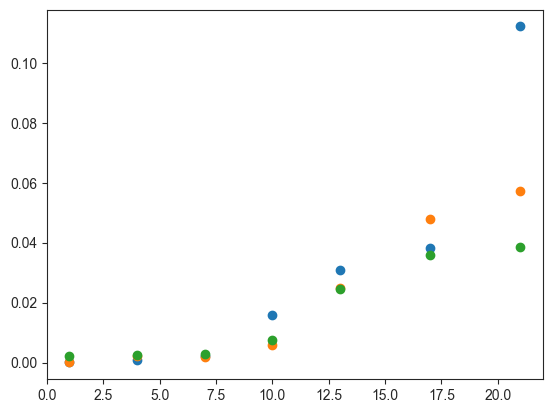

In [20]:

# condition_properties = {'Evo1D_IRAs':{1:[0,1,4,7,10,13,16,19,22,24],
#                                       2:[0,1,4,7,10,13,16,19,22,24]},
#                         'Evo1D_TCG':{1:[0,1,4,8,10,13,16,19,22,24],
#                                     2:[0,1,4,8,10,13,16,19,22,24]},
for condition,reps in condition_properties.items():
    if 'Ira1' in condition:
        for rep,timepoints in reps.items():
            
            print(len(timepoints),len(mean_fitness_dict[f'{condition}_{rep}']))
        

            plt.scatter(timepoints[1:-1],mean_fitness_dict[f'{condition}_{rep}'],label=f'{condition}_{rep}')
            
plt.legend()

In [14]:
home_dir = '~/Documents/Stanford/Research/EvolvingFront/'
# home_dir = os.path.expanduser(home_dir)
rearray_map = p.read_csv(f'{home_dir}/data/BenomylTest/EvolvingFront_rearray_map_with_ploidy.csv')

remeasurement_data = p.read_csv(f'{home_dir}/data/fitness_withMutations.csv',index_col=0)

bcs_isolated_here = []
for bc,cloneID in zip(remeasurement_data['barcode'].values,remeasurement_data['cloneID_new'].values):
#     print(cloneID)
    if not p.isnull(cloneID):
        if 'rearray' in cloneID:
            source_well = rearray_map[rearray_map['destination_well']==cloneID]['source_well'].values[0]

#             if 'EVO1D_IRAs_R1' in source_well:
                
            if 'EVO2D_IRA1_MIS_R2' in source_well:

                bcs_isolated_here.append(bc)

isolated_here = remeasurement_data[remeasurement_data['barcode'].isin(bcs_isolated_here)]

overlapping_bcs = [bc for bc in this_data['barcode'].values if bc in isolated_here['barcode'].values]

In [15]:
overlapping_bcs

['TGATCAATCTACAAAAATATTTAATG_CTCTTAATAGTGAATATTGTTAACAC',
 'CATTGAATCACAAAATAGGTTAGATG_CTAAAAACCTTAAATTAATTTCAAAT',
 'CATTGAATCACAAAATAGGTTAGATG_TGTTAAACCCATAAATTCGTTTGGCG',
 'CATTGAATCACAAAATAGGTTAGATG_CGGTAAACGGGAAACTTGCTTGGGGC',
 'CATTGAATCACAAAATAGGTTAGATG_AATCTAACTTTGAAGGTTATTAATTT',
 'TGATCAATCTACAAAAATATTTAATG_TGATTAACTAAAAAAGAACTTACATC',
 'TGATCAATCTACAAAAATATTTAATG_GGGCGAAACTGCAAGGCAGTTAGGCG',
 'CATTGAATCACAAAATAGGTTAGATG_AACGAAAGTTCCAACTACTTTTGAAT',
 'TGATCAATCTACAAAAATATTTAATG_GCGAGAAGGGTTAATGAACTTCAGCC',
 'TGATCAATCTACAAAAATATTTAATG_CCGGGAAGAAAGAAACGGATTACTAG',
 'TGATCAATCTACAAAAATATTTAATG_CCTTTAAACCAGAAATCAATTTTCCT',
 'TGATCAATCTACAAAAATATTTAATG_GCCTGAATCTTTAAGCCGTTTAGGGA',
 'CATTGAATCACAAAATAGGTTAGATG_TCATTAAGTTAGAAGCTGATTCTTTG',
 'TGATCAATCTACAAAAATATTTAATG_ATTACAACTCATAAGAATGTTTTGCG',
 'TGATCAATCTACAAAAATATTTAATG_TTAGCAAAACTAAACTTACTTATAAA',
 'CATTGAATCACAAAATAGGTTAGATG_ACGCAAACCACAAATGCCGTTAGAAG',
 'TGATCAATCTACAAAAATATTTAATG_AGTTAAAGCATGAACCGATTTTTCCC',
 'TGATCAATCTAC

Text(0.5, 1.0, 'Evo2D_Ira1_Mis R2')

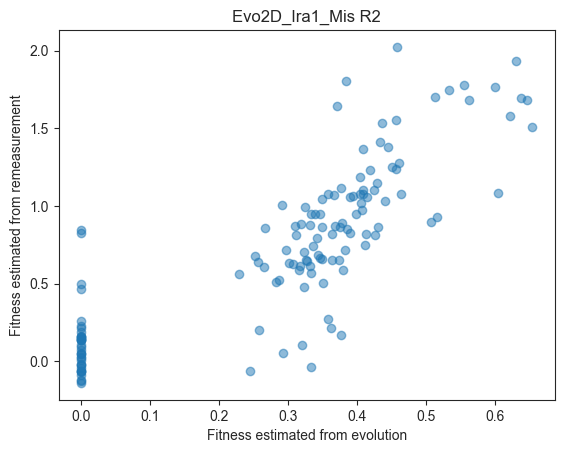

In [28]:

ancestor = 'IRA1_MIS'
fitness = 'Fit2D_both2%5%_fitness'
fitness = 'Fit2D_early_fitness'


overlap_evo = this_fit_mut[this_fit_mut['barcode'].isin(overlapping_bcs)]
overlap_evo = overlap_evo.sort_values('barcode')

overlap_fit = remeasurement_data[remeasurement_data['barcode'].isin(overlapping_bcs)]
overlap_fit = overlap_fit.sort_values('barcode')

# tools.ancestral_mutations

ancestor_fit = remeasurement_data[remeasurement_data['barcode']==tools.rebarcoding_source_mutants[ancestor]][fitness].values[0]

# ancestor_fit = remeasurement_data[remeasurement_data[]




plt.scatter(8*overlap_evo['Fitness'].values,
            overlap_fit[fitness].values-ancestor_fit,alpha=0.5)

plt.xlabel('Fitness estimated from evolution')
plt.ylabel('Fitness estimated from remeasurement')
plt.title(f'{condition} R{rep}')

In [25]:
remeasurement_data[(remeasurement_data['ancestor']=='IRA1_MIS') & 
                   (remeasurement_data['class_new']=='adaptive_haploid') &  
                   (remeasurement_data['gene'].isin(['CIT1','ARO80','GSH1']))][['Fit2D_early_fitness','gene','barcode']]

Fit2D_early_fitness   gene  \
78               2.209220  ARO80   
351              2.108699   GSH1   
704              2.103156   CIT1   
769              2.385438   CIT1   
1000             2.376598  ARO80   
1399             2.145347  ARO80   
1823             2.483546  ARO80   
2090             2.382052   CIT1   
2098             2.133677   GSH1   
2354             2.424414  ARO80   
3030             1.896178   CIT1   
3354             2.589127  ARO80   
3489             2.145777   CIT1   
3537             2.098683   GSH1   
3990             2.253775   CIT1   
4326             2.361128   CIT1   
4335             2.166065   CIT1   
4549             2.226622   CIT1   

                                                barcode  
78    CATTGAATCACAAAATAGGTTAGATG_GAGACAAGCCTTAATTGGG...  
351   TGATCAATCTACAAAAATATTTAATG_TATATAAGATGCAATCCCT...  
704   TGATCAATCTACAAAAATATTTAATG_TGTGGAACGCAAAAGGAAA...  
769   TGATCAATCTACAAAAATATTTAATG_GACAAAAACTACAATAGTC...  
1000  TATCGAAACCCAAAGAGATTTAATCG_GGGCGAACCGGAAAGGGGG...  
1399  TGATCAATCTACAAAAATATTTAATG_ACATCAATACGGAATCGCT...  
1823  TATCGAAACCCAAAGAGATTTAATCG_GCTTCAATAACCAAAGAGG...  
2090  TGATCAATCTACAAAAATATTTAATG_ACACTAACTCTCAACTATT...  
2098  TATCGAAACCCAAAGAGATTTAATCG_GACGCAATTTGAAACCCAG...  
2354  TATCGAAACCCAAAGAGATTTAATCG_ATGTTAAAGATTAATGGAC...  
3030  TGATCAATCTACAAAAATATTTAATG_GCTAAAACATTAAAGCGGT...  
3354  TATCGAAACCCAAAGAGATTTAATCG_AGCTTAAAAACAAACAATT...  
3489  CATTGAATCACAAAATAGGTTAGATG_ATCGTAAGCGTGAAAGGGT...  
3537  TGATCAATCTACAAAAATATTTAATG_GATTTAAAAGATAATATAA...  
3990  TGATCAATCTACAAAAATATTTAATG_ACGACAATCTCGAATAGGT...  
4326  TGATCAATCTACAAAAATATTTAATG_AATTTAAACATTAATTCGT...  
4335  CATTGAATCACAAAATAGGTTAGATG_TTCTCAACAATAAAACCCG...  
4549  TGATCAATCTACAAAAATATTTAATG_AAGGAAACCGATAAGGTGT...

In [ ]:
remse

59 59


/Users/grantkinsler/Library/Python/3.8/lib/python/site-packages/matplotlib/cbook/__init__.py:1026: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  x = np.asanyarray(x)


Text(0.5, 1.0, 'Evo2D_Ira1_Mis R2')

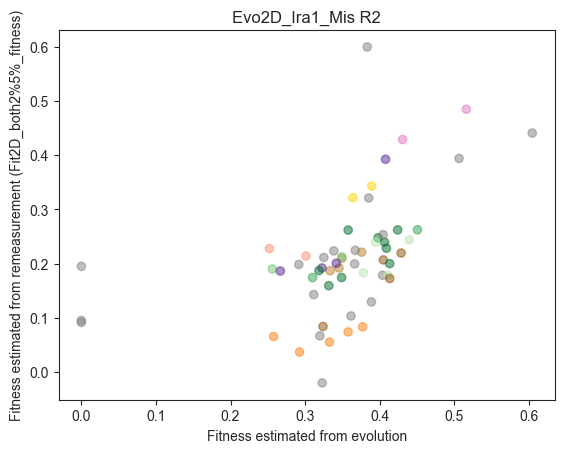

In [54]:

set_to_plot = remeasurement_data[(remeasurement_data['ancestor']=='IRA1_MIS') & 
                   (remeasurement_data['class_new']=='adaptive_haploid')]
#                    (remeasurement_data['gene'].isin(['CIT1','KGD1','MDH1','RTG2','ARO80','GSH1']))
#                                 ]

ancestor = 'IRA1_MIS'
fitness = 'Fit2D_both2%5%_fitness'
# fitness = 'Fit2D_early_fitness'

barcodes_to_plot = set_to_plot['barcode'].values
# genes = set_to_plot['gene'].values

barcodes_to_plot = [bc for bc in barcodes_to_plot if bc in overlapping_bcs]

# barcodes_to_plot = overlapping_bcs

overlap_evo = this_fit_mut[this_fit_mut['barcode'].isin(barcodes_to_plot)]
overlap_evo = overlap_evo.sort_values('barcode')

overlap_fit = remeasurement_data[remeasurement_data['barcode'].isin(barcodes_to_plot)]
overlap_fit = overlap_fit.sort_values('barcode')

print(len(overlap_evo),len(overlap_fit))

ancestor_fit = remeasurement_data[remeasurement_data['barcode']==tools.rebarcoding_source_mutants[ancestor]][fitness].values[0]

# ancestor_fit = remeasurement_data[remeasurement_data[]


colors = [tools.find_mutation_color(gene) for gene in overlap_fit['gene'].values]

plt.scatter(8*overlap_evo['Fitness'].values,
            overlap_fit[fitness].values-ancestor_fit,alpha=0.5,c=colors)

plt.xlabel('Fitness estimated from evolution')
plt.ylabel(f'Fitness estimated from remeasurement ({fitness})')
plt.title(f'{condition} R{rep}')

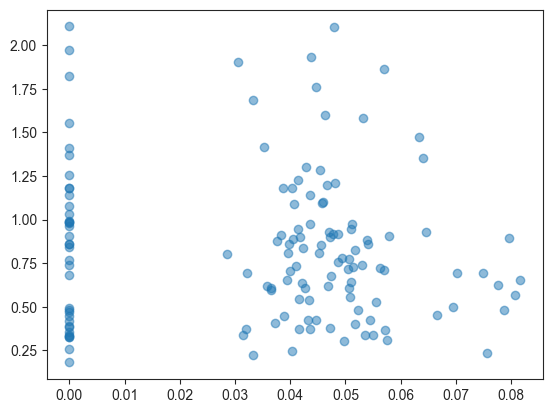

In [37]:
plt.scatter(this_fit_mut[this_fit_mut['barcode'].isin(overlapping_bcs)]['Fitness'].values,
            remeasurement_data[remeasurement_data['barcode'].isin(overlapping_bcs)]['Fit3D_both2%5%_fitness'].values,alpha=0.5)

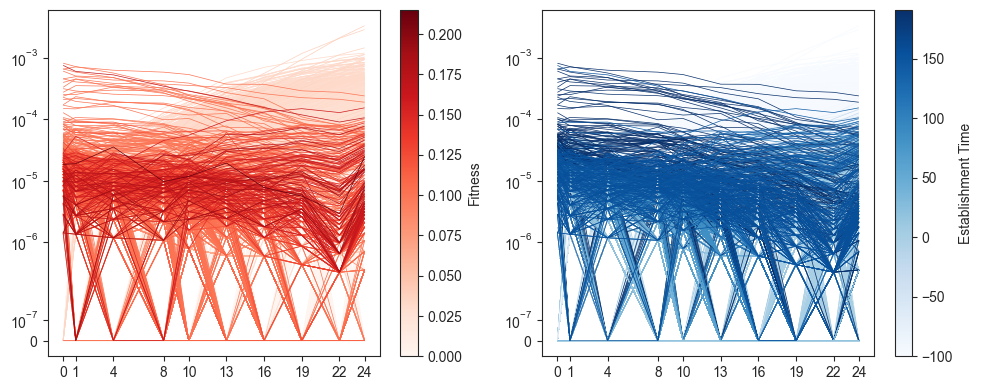

In [102]:
fitness_order = np.argsort(this_fit_mut['Fitness'].values)

fig,ax = plt.subplots(figsize=(10,4))
plt.subplot(1,2,1)
these_ts = np.tile(timepoints,this_data[all_samples].shape[0]).reshape(this_data[all_samples].shape)
these_freqs = (this_data[all_samples]/np.nansum(this_data[all_samples],axis=0)).values
these_freqs = these_freqs[fitness_order,:]

lc = multiline(these_ts,these_freqs, 
               this_fit_mut['Fitness'].values[fitness_order], cmap='Reds', lw=0.5)

axcb = fig.colorbar(lc)
axcb.set_label('Fitness')

plt.yscale('symlog',linthresh=1/(max(np.nansum(this_data[all_samples],axis=0))+10))
plt.xticks(timepoints,timepoints)

plt.subplot(1,2,2)
#         these_ts = np.tile(timepoints,this_data[all_samples].shape[0]).reshape(this_data[all_samples].shape)
#         these_freqs = (this_data[all_samples]/np.nansum(this_data[all_samples],axis=0)).values
#         these_freqs = these_freqs[fitness_order,:]

lc = multiline(these_ts,these_freqs, 
               this_fit_mut['Establishment_Time'].values[fitness_order], cmap='Blues', lw=0.5)

axcb = fig.colorbar(lc)
axcb.set_label('Establishment Time')

plt.yscale('symlog',linthresh=1/(max(np.nansum(this_data[all_samples],axis=0))+10))
plt.xticks(timepoints,timepoints)

plt.tight_layout()
plt.savefig(f'figures/{condition}_{rep}_trajectories_fitness_establishment.pdf',bbox_inches='tight')

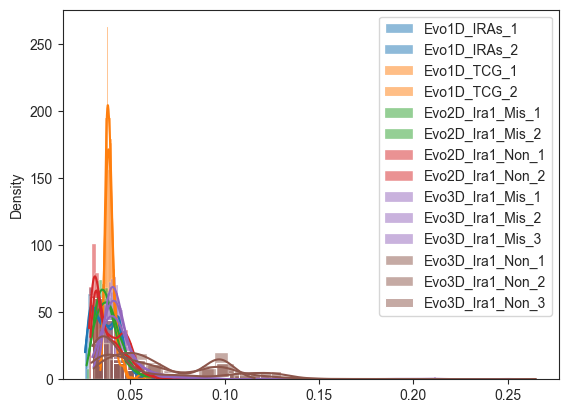

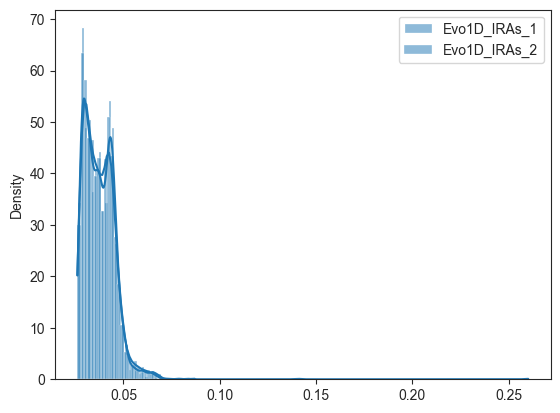

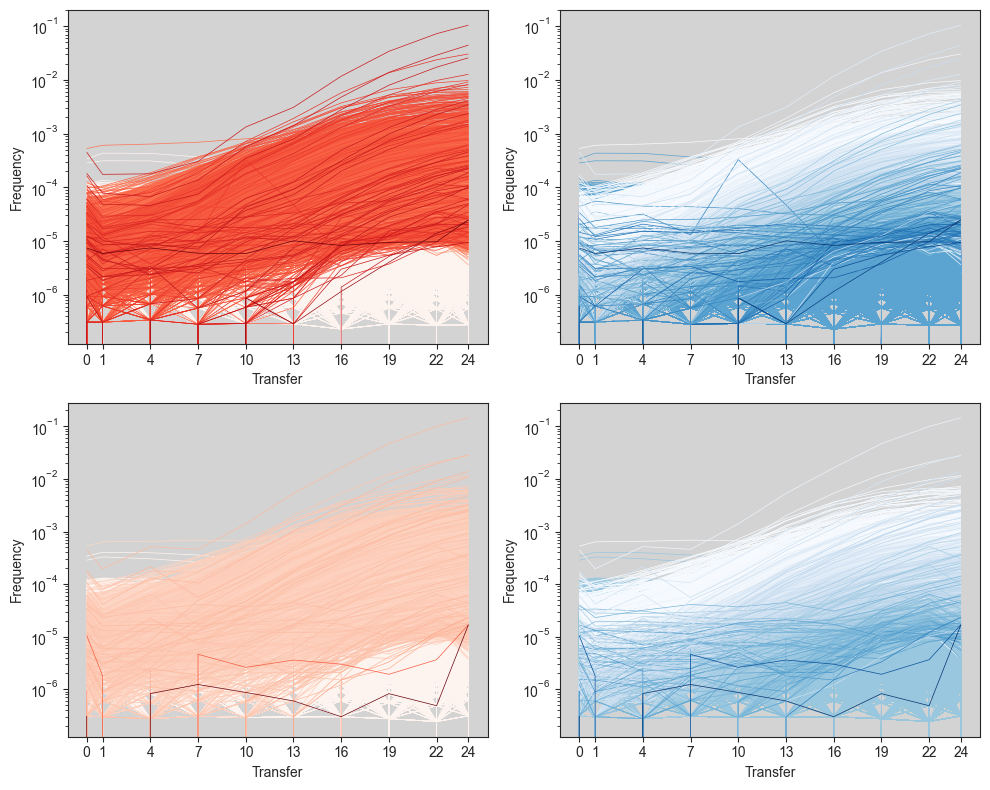

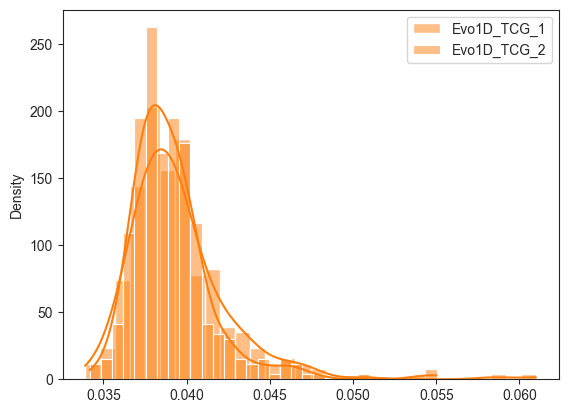

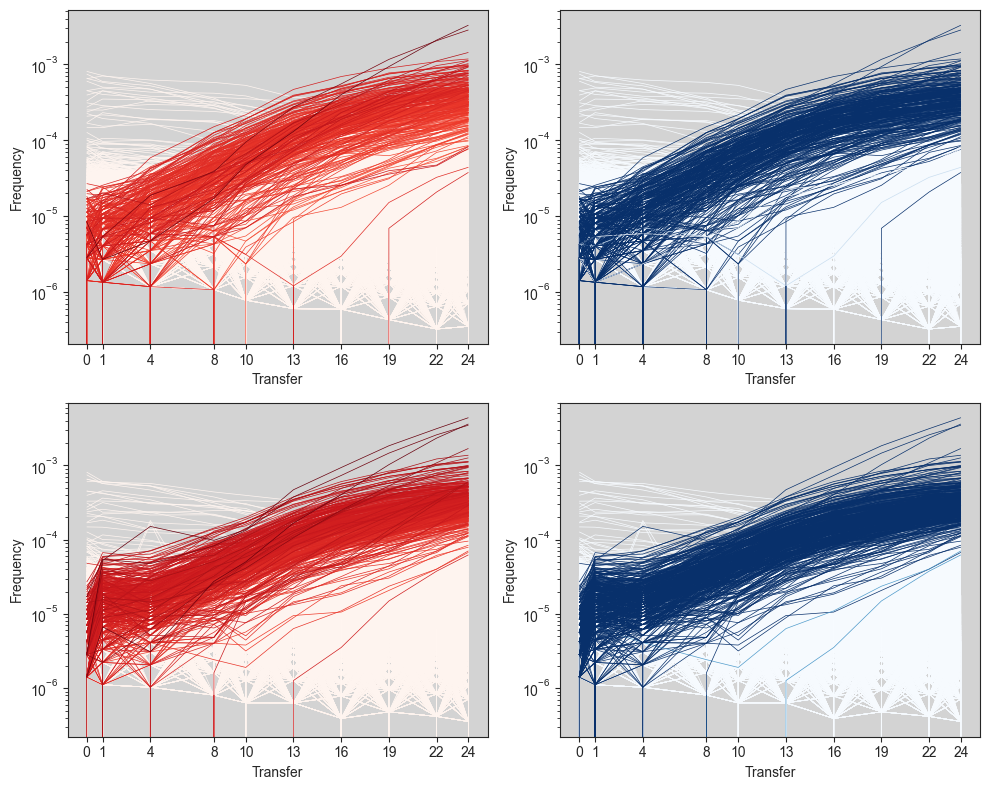

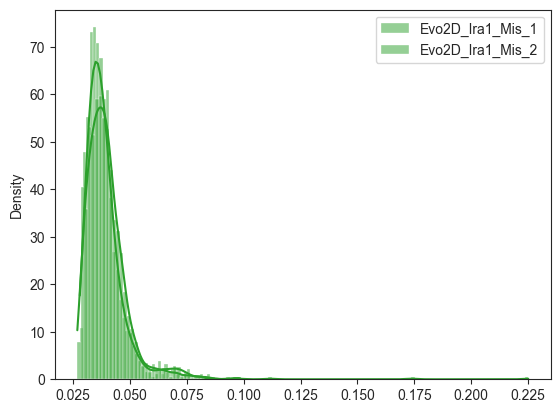

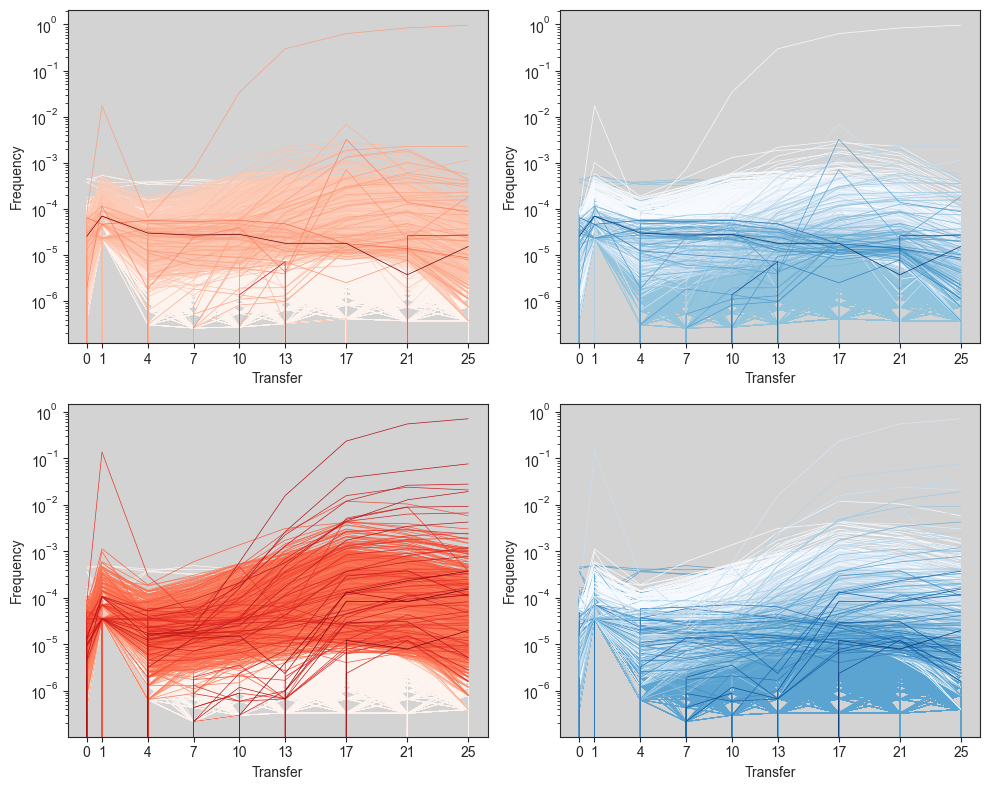

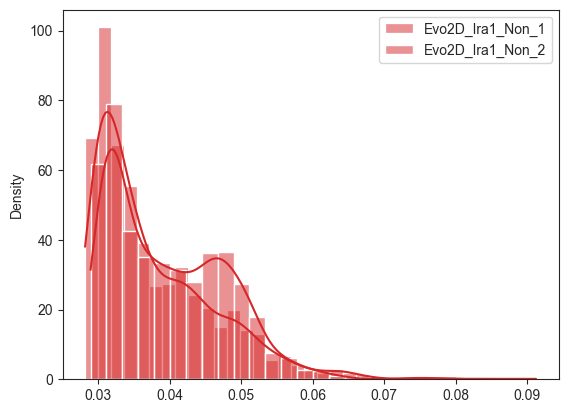

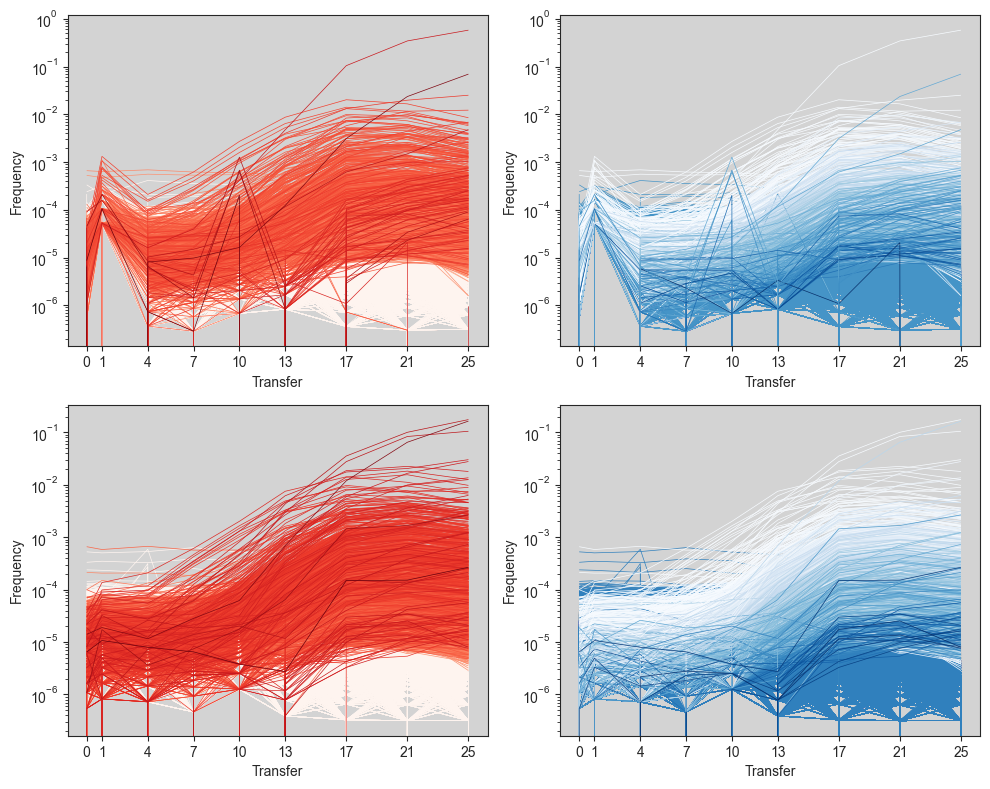

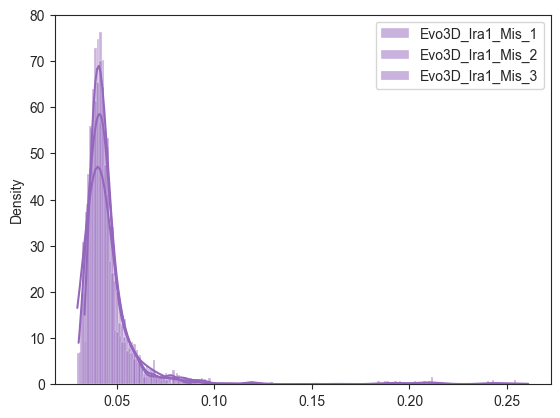

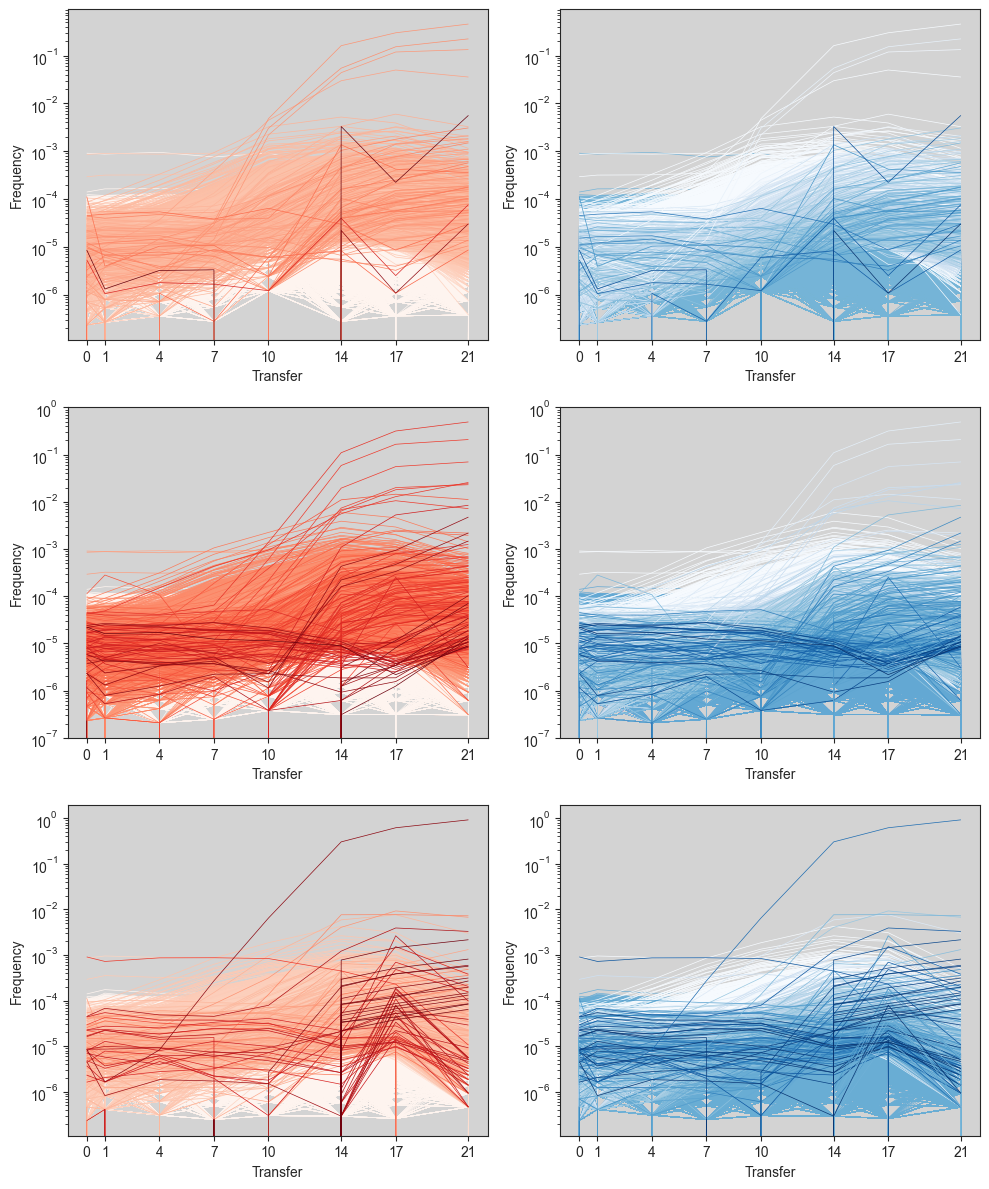

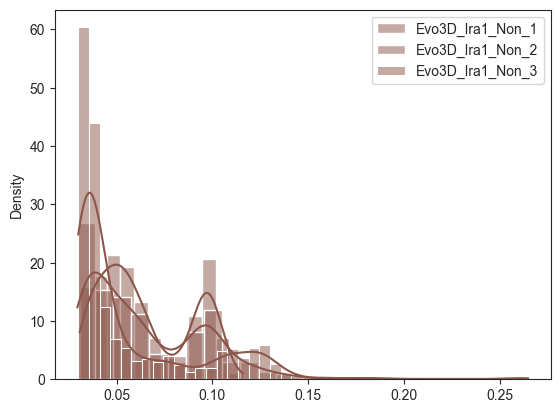

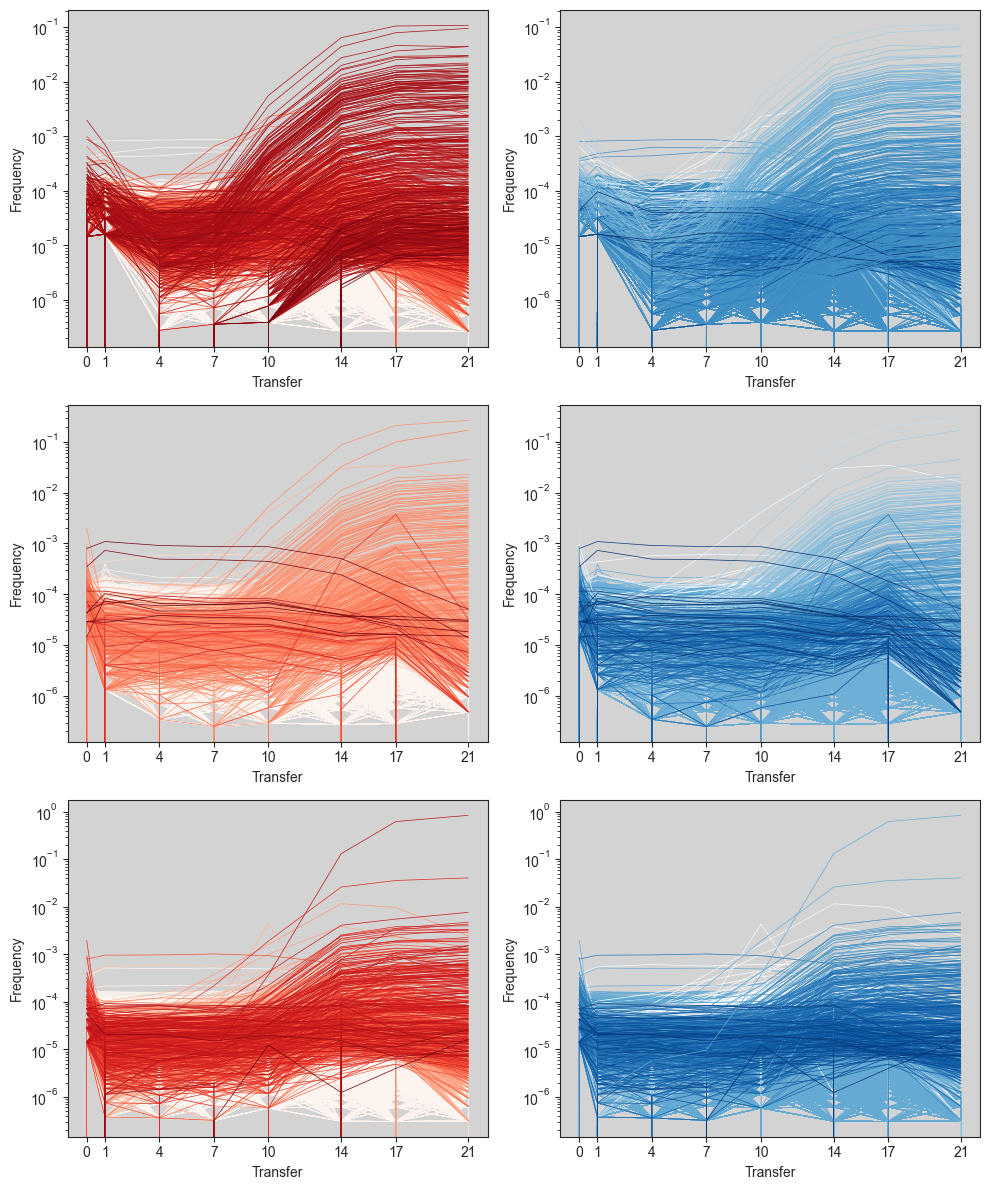

In [129]:
condition_properties = {
                        'Evo1D_IRAs':{1:[0,1,4,7,10,13,16,19,22,24],
                                      2:[0,1,4,7,10,13,16,19,22,24]},
                        'Evo1D_TCG':{1:[0,1,4,8,10,13,16,19,22,24],
                                    2:[0,1,4,8,10,13,16,19,22,24]},
                        
                        'Evo2D_Ira1_Mis':{1:[0,1,4,7,10,13,17,21,25],
                                         2:[0,1,4,7,10,13,17,21,25]},
                        'Evo2D_Ira1_Non':{1:[0,1,4,7,10,13,17,21,25],
                                         2:[0,1,4,7,10,13,17,21,25]},
                        
                        'Evo3D_Ira1_Mis':{1:[0,1,4,7,10,14,17,21],
                                         2:[0,1,4,7,10,14,17,21],
                                         3:[0,1,4,7,10,14,17,21]},
                        'Evo3D_Ira1_Non':{1:[0,1,4,7,10,14,17,21],
                                         2:[0,1,4,7,10,14,17,21],
                                         3:[0,1,4,7,10,14,17,21]},
                       }

condition_colors = {key:sns.color_palette()[i] for i,key in enumerate(condition_properties.keys())}


# condition_properties = {'Evo3D_Ira1_Non':{1:[0,1,4,7,10,14,17,21],
#                                          2:[0,1,4,7,10,14,17,21],
#                                          3:[0,1,4,7,10,14,17,21]}}

all_dfes,all_dfes_ax = plt.subplots()

adaptives_big = {}

for condition,reps in condition_properties.items():
    this_data = p.read_csv(f'{condition}_counts_curated.csv')
    
#     this_trajs = plt.figure(figsize=(4*len(reps.keys())+1,4*2))
#     grids

    this_dfe,this_dfe_ax = plt.subplots()
    
    traj_fig,traj_ax = plt.subplots(figsize=(10,4*len(reps)),nrows=len(reps),ncols=2)

    for rep,timepoints in reps.items():
        
        all_samples = []
        for time in timepoints:
            if time == 0:
                all_samples.append(f'{condition}_0_0_count')
            else:
                all_samples.append(f'{condition}_{rep}_{time}_count')
                
    
        this_data['barcode'] = this_data['fused_bc']

        this_fit_mut = p.read_csv(f'FitMut2_processing/out_fitmut1_thresholded/{condition}_{rep}_MutSeq_Result.csv')

        mean_fitness = this_fit_mut['Mean_Fitness'].values
        mean_fitness = mean_fitness[~np.isnan(mean_fitness)]

        kappas = this_fit_mut['Kappa_Value'].values
        kappas = kappas[~np.isnan(kappas)]


        mutant_cell_fraction = this_fit_mut['Mutant_Cell_Fraction'].values
        mutant_cell_fraction = mutant_cell_fraction[~np.isnan(mutant_cell_fraction)]


        this_fit_mut = this_fit_mut[['Fitness','Establishment_Time','Error_Fitness','Error_Establishment_Time']]
        this_fit_mut['barcode'] = this_data['barcode']
    #     inference_time = 

    #     if condition == 'Evo2D_Ira1_non':
    #         break
        adaptive_only = this_fit_mut[this_fit_mut['Fitness']>0]
        adaptives_big[f'{condition}_{rep}'] = adaptive_only

# #         sns.kdeplot(adaptive_only['Fitness'].values,label=f'{condition}_{rep}',alpha=0.5)
#         plt.gca()

        sns.histplot(adaptive_only['Fitness'].values,stat='density',label=f'{condition}_{rep}',kde=True,ax=all_dfes_ax,
                    color=condition_colors[condition])
    
        sns.histplot(adaptive_only['Fitness'].values,stat='density',label=f'{condition}_{rep}',kde=True,ax=this_dfe_ax,
                    color=condition_colors[condition])
        
        
        fitness_order = np.argsort(this_fit_mut['Fitness'].values)
        
        these_ts = np.tile(timepoints,this_data[all_samples].shape[0]).reshape(this_data[all_samples].shape)
        these_freqs = (this_data[all_samples]/np.nansum(this_data[all_samples],axis=0)).values
        these_freqs = these_freqs[fitness_order,:]
        
#         traj_fit.add_subplot()

        lc = multiline(these_ts,these_freqs, 
                       this_fit_mut['Fitness'].values[fitness_order], ax=traj_ax[rep-1,0],
                       cmap='Reds', lw=0.5)

#         axcb = traj_fig.colorbar(lc)
#         axcb.set_label('Fitness')

        traj_ax[rep-1,0].set_yscale('log')
        traj_ax[rep-1,0].set_xticks(timepoints,timepoints)
        
        traj_ax[rep-1,0].set_xlabel('Transfer')
        traj_ax[rep-1,0].set_ylabel('Frequency')

#         traj_fit.add_subplot()

        traj_ax[rep-1,0].set_facecolor('lightgrey')

        lc = multiline(these_ts,these_freqs, 
                       this_fit_mut['Establishment_Time'].values[fitness_order], ax=traj_ax[rep-1,1],
                       cmap='Blues', lw=0.5)

#         axcb = traj_fig.colorbar(lc)
#         axcb.set_label('Establishment Time')

        traj_ax[rep-1,1].set_yscale('log')
        traj_ax[rep-1,1].set_xticks(timepoints,timepoints)
        
        traj_ax[rep-1,1].set_xlabel('Transfer')
        traj_ax[rep-1,1].set_ylabel('Frequency')
        
        traj_ax[rep-1,1].set_facecolor('lightgrey')
    
    this_dfe_ax.legend()
    this_dfe.savefig(f'figures/fitmut1/{condition}_dfes.pdf',bbox_inches='tight')
        
    
    traj_fig.tight_layout()
    traj_fig.savefig(f'figures/fitmut1/{condition}_trajectories_fitness_establishment.pdf',bbox_inches='tight')

all_dfes_ax.legend()
all_dfes.savefig(f'figures/fitmut1/all_dfes.pdf',bbox_inches='tight')


In [79]:
def logistic_f(x,L,k,x0):
    
    return L/(1+np.exp(-k*(x-x0)))

def logifunc(x,A,x0,k,off):
    return A / (1 + np.exp(-k*(x-x0)))+off

def expfunc(x,a,b,c):
    return a*np.exp(b*x)+c
    
# popt,pcov = scipy.optimize.curve_fit(logifunc,used_timepoints[:-1],mean_fitness)
popt,pcov = scipy.optimize.curve_fit(expfunc,used_timepoints[:-1],mean_fitness)



In [80]:
pcov

array([[ 7.65540691e-18, -1.65338334e-12,  1.11564369e+20],
       [-1.65338334e-12,  3.57090942e-07, -2.40952142e+25],
       [ 1.11564369e+20, -2.40952142e+25,  1.93550493e+84]])

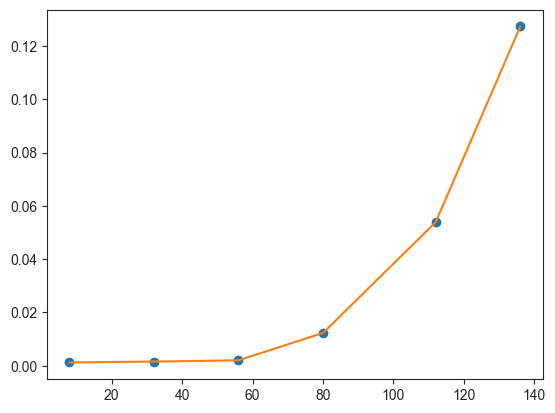

In [135]:
ts = np.linspace(used_timepoints[0],used_timepoints[-2],150)

# plt.plot(ts,logistic_f(ts,*popt))
# plt.plot(ts,logifunc(ts,*popt))
# plt.plot(ts,expfunc(ts,*popt))
plt.plot(used_timepoints[:-1],mean_fitness,'o')
plt.plot(ts,interpolationf(ts))

ts = np.linspace(0,150)
mean_fitness_est = expfunc(ts,0.001,0.035,0)



# plt.yscale('log')

In [136]:
effective_lineage_size = 6*10**8/len(this_data)


# mean_fitness_est = expfunc(ts,0.001,0.035,0)

interpolationf = scipy.interpolate.interp1d(used_timepoints[:-1],mean_fitness)

ts = np.linspace(used_timepoints[0],used_timepoints[-2],150)

mean_fitness_est = interpolationf(ts)

s_vals = mean_fitness_est
ts_clonal = [ts[i]-(1/sval) for i,sval in enumerate(s_vals)]
ts_clonal_size = [ts[i]-(1/sval)*np.log(effective_lineage_size*sval) for i,sval in enumerate(s_vals)]

/var/folders/9y/6d7h4kvn6f989_h_gypc_j_00000gn/T/ipykernel_70937/1338041628.py:19: RuntimeWarning: divide by zero encountered in log
  plt.scatter(adaptives['Establishment_Time'],adaptives['Fitness'],s=2*np.log(t21_count),color=color_list,alpha=0.8)
/Users/grantkinsler/Library/Python/3.8/lib/python/site-packages/matplotlib/cbook/__init__.py:1026: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  x = np.asanyarray(x)
/Users/grantkinsler/Library/Python/3.8/lib/python/site-packages/matplotlib/collections.py:981: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


Text(0, 0.5, 'Fitness')

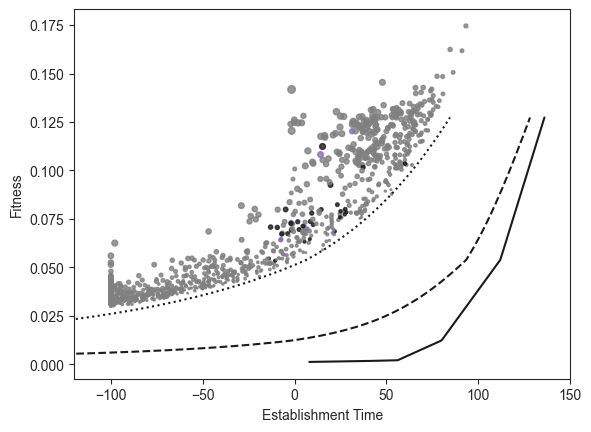

In [137]:
adaptives = this_fit_mut[this_fit_mut['Fitness'] > 0 ]
t21_count = this_data[this_data['barcode'].isin(adaptives['barcode'].values)]['Evo3D_Ira1_Non_3_21_count'].values

color_list = []

for bc in adaptives['barcode'].values:
    if bc in overlap_fit['barcode'].values:
        this_entry = overlap_fit[overlap_fit['barcode']==bc]
        
        this_gene = this_entry['gene'].values[0]
        
        if not p.isnull(this_gene):
            color_list.append(tools.find_mutation_color(this_gene))
        else:
            color_list.append('k')
    else:
        color_list.append('gray')

plt.scatter(adaptives['Establishment_Time'],adaptives['Fitness'],s=2*np.log(t21_count),color=color_list,alpha=0.8)

used_timepoints = [8,32,56,80,112,136,168]

# ts = 

# plt.plot(8*np.asarray(timepoints[2:]),mean_fitness,color='k')
# plt.plot(used_timepoints[:-1],mean_fitness,color='k')
# plt.plot(ts_clonal,mean_fitness,color='k',linestyle='--')
# plt.plot(ts_clonal_size,mean_fitness,color='k',linestyle=':')

plt.plot(ts,mean_fitness_est,color='k')
plt.plot(ts_clonal,mean_fitness_est,color='k',linestyle='--')
plt.plot(ts_clonal_size,mean_fitness_est,color='k',linestyle=':')

plt.xlim(-120,150)

plt.xlabel('Establishment Time')
plt.ylabel('Fitness')

# plt.savefig(f'figures/fitmut1/{condition}_{rep}_Establishment_vs_Fitness_lined.pdf',bbox_inches='tight')

In [ ]:
def infer_dfe(interval=0.002)

In [128]:
no_preexisting = adaptives[adaptives['Establishment_Time']]

Fitness  Establishment_Time  Error_Fitness  Error_Establishment_Time  \
4       0.039359         -100.000000       0.004065                 22.569982   
48      0.039332          -52.950182       0.000005                  0.010915   
206     0.106382           46.238923       0.007858                  6.569466   
235     0.051715          -11.101598       0.015259                 39.071306   
256     0.033797         -100.000000       0.006146                 39.737864   
...          ...                 ...            ...                       ...   
109474  0.124555            3.862265       0.000642                       inf   
109518  0.124695           -0.146950       0.000864                       inf   
109529  0.126139           -0.161394       0.000987                       inf   
109530  0.128173            4.818272       0.001585                       inf   
109535  0.123944           -2.139437       0.001045                       inf   

                                                  barcode  
4       ATCACAATAACTAAACTGATTCTTCA_CGAGCAAGGTCAAATGTTG...  
48      ATCACAATAACTAAACTGATTCTTCA_TGTACAATCTCGAAGTTCG...  
206     ATCACAATAACTAAACTGATTCTTCA_CGCGCAAGCGAGAAGGGCC...  
235     ATCACAATAACTAAACTGATTCTTCA_TTATAAATATTAAAAAGGT...  
256     ATCACAATAACTAAACTGATTCTTCA_TCTCTAAACGAAAAACTAT...  
...                                                   ...  
109474  ATCACAATAACTAAACTGATTCTTCA_CTCATAACATCAAAAAAAA...  
109518  ATAACAATAACTAAACTGATTCTTCA_CTCATAACATCAAAAAAAA...  
109529  ATCACAATAACTAAACTGATTATTCA_CTCATAACATCAAAAAAAA...  
109530  ATCATAATAACTAAACTGATTCTTCA_CTCATAACATCAAAAAAAA...  
109535  ATCACAATAACTAAACTGATTCTTCG_CTCATAACATCAAAAAAAA...  

[1685 rows x 5 columns]

In [42]:
adaptives[adaptives]

array([-807.32716933, -636.67327997, -487.56238729,  -81.23281459,
        -18.48986986,   -7.72773191])

In [61]:
for condition,reps in condition_properties.items():
    this_data = p.read_csv(f'{condition}_counts_curated.csv')

    for rep,timepoints in reps.items():
        
        all_samples = []
        for time in timepoints:
            if time == 0:
                all_samples.append(f'{condition}_0_0_count')
            else:
                all_samples.append(f'{condition}_{rep}_{time}_count')
                
    
        this_data['barcode'] = this_data['fused_bc']

        this_fit_mut = p.read_csv(f'FitMut2_processing/out_fitmut1_thresholded/{condition}_{rep}_MutSeq_Result.csv')

        mean_fitness = this_fit_mut['Mean_Fitness'].values
        mean_fitness = mean_fitness[~np.isnan(mean_fitness)]

        kappas = this_fit_mut['Kappa_Value'].values
        kappas = kappas[~np.isnan(kappas)]


        mutant_cell_fraction = this_fit_mut['Mutant_Cell_Fraction'].values
        mutant_cell_fraction = mutant_cell_fraction[~np.isnan(mutant_cell_fraction)]


        this_fit_mut = this_fit_mut[['Fitness','Establishment_Time','Error_Fitness','Error_Establishment_Time']]
        this_fit_mut['barcode'] = this_data['barcode']
    #     inference_time = 

#         if condition == 'Evo2D_Ira1_non':
#             break
#         adaptive_only = this_fit_mut[this_fit_mut['Probability_Adaptive']>0.5]
        
#         print(f'{condition}_{rep}',len(adaptive_only))
#         sns.histplot(adaptive_only['Fitness'].values,label=f'{condition}_{rep}',kde=True)
#         plt.legend()
    print(condition)
#     if condition == 'Evo2D_Ira1_Mis':
    if condition == 'Evo2D_Ira1_Non':
        break
        
#         fitness_order = np.argsort(this_fit_mut['Fitness'].values)

#         fig,ax = plt.subplots(figsize=(10,4))
#         plt.subplot(1,2,1)
#         these_ts = np.tile(timepoints,this_data[all_samples].shape[0]).reshape(this_data[all_samples].shape)
#         these_freqs = (this_data[all_samples]/np.nansum(this_data[all_samples],axis=0)).values
#         these_freqs = these_freqs[fitness_order,:]

#         lc = multiline(these_ts,these_freqs, 
#                        this_fit_mut['Fitness'].values[fitness_order], cmap='Reds', lw=0.5)

#         axcb = fig.colorbar(lc)
#         axcb.set_label('Fitness')

#         plt.yscale('log')
#         plt.xticks(timepoints,timepoints)

#         plt.subplot(1,2,2)

#         lc = multiline(these_ts,these_freqs, 
#                        this_fit_mut['Establishment_Time'].values[fitness_order], cmap='Blues', lw=0.5)

#         axcb = fig.colorbar(lc)
#         axcb.set_label('Establishment Time')

#         plt.yscale('log')
#         plt.xticks(timepoints,timepoints)

#         plt.tight_layout()
#         plt.savefig(f'figures/{condition}_{rep}_trajectories_fitness_establishment.pdf',bbox_inches='tight')




Evo1D_IRAs
Evo1D_TCG
Evo2D_Ira1_Mis
Evo2D_Ira1_Non


In [62]:
condition

'Evo2D_Ira1_Non'

In [65]:
home_dir = '~/Documents/Stanford/Research/EvolvingFront/'
# home_dir = os.path.expanduser(home_dir)
rearray_map = p.read_csv(f'{home_dir}/data/BenomylTest/EvolvingFront_rearray_map_with_ploidy.csv')

remeasurement_data = p.read_csv(f'{home_dir}/data/fitness_withMutations.csv',index_col=0)

bcs_isolated_here = []
for bc,cloneID in zip(remeasurement_data['barcode'].values,remeasurement_data['cloneID_new'].values):
#     print(cloneID)
    if not p.isnull(cloneID):
        if 'rearray' in cloneID:
            source_well = rearray_map[rearray_map['destination_well']==cloneID]['source_well'].values[0]

#             if 'EVO1D_IRAs_R1' in source_well:
                
            if 'EVO2D_IRA1_NON_R2' in source_well:

                bcs_isolated_here.append(bc)

isolated_here = remeasurement_data[remeasurement_data['barcode'].isin(bcs_isolated_here)]

overlapping_bcs = [bc for bc in this_data['barcode'].values if bc in isolated_here['barcode'].values]

Text(0.5, 1.0, 'Evo2D_Ira1_Non R2')

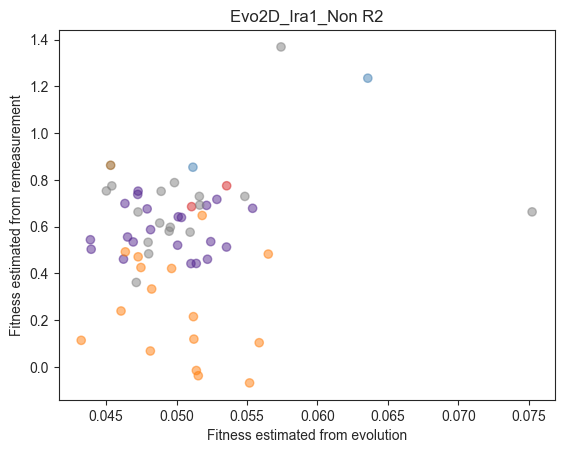

In [69]:

ancestor = 'IRA1_NON'
# fitness = 'Fit3D_both2%5%_fitness'
# fitness = 'Fit3D_early_fitness'
fitness = 'Fit2D_early_fitness'
# fitness = 'Fit2D_both2%5%_fitness'


overlap_evo = this_fit_mut[this_fit_mut['barcode'].isin(overlapping_bcs)]
overlap_evo = overlap_evo.sort_values('barcode')

overlap_fit = remeasurement_data[remeasurement_data['barcode'].isin(overlapping_bcs)]
overlap_fit = overlap_fit.sort_values('barcode')

# tools.ancestral_mutations

ancestor_fit = remeasurement_data[remeasurement_data['barcode']==tools.rebarcoding_source_mutants[ancestor]][fitness].values[0]

# ancestor_fit = remeasurement_data[remeasurement_data[]


colors = [tools.find_mutation_color(gene) for gene in overlap_fit['gene'].values]


plt.scatter(overlap_evo['Fitness'].values,
            overlap_fit[fitness].values-ancestor_fit,alpha=0.5,c=colors)

plt.xlabel('Fitness estimated from evolution')
plt.ylabel('Fitness estimated from remeasurement')
plt.title(f'{condition} R{rep}')

In [85]:
bc_list = this_fit_mut.sort_values('Fitness',ascending=False)['barcode'].values[:10]

In [86]:
this_data[this_data['barcode'].isin(bc_list)]

high_diversity_BC            low_diversity_BC  \
5431   TATAGAAAATACAAAACCATTAACCC  ATCACAATAACTAAACTGATTCTTCA   
5841   TCCCTAACATTAAAAATTCTTCGGAG  ATCACAATAACTAAACTGATTCTTCA   
6974   TAAATAAACTAGAAAAATCTTTTATA  ATCACAATAACTAAACTGATTCTTCA   
7781   GCAAAAACCTGTAACGCGATTATGAT  ATCACAATAACTAAACTGATTCTTCA   
21567  ACATAAAACCACAATTGAGTTGCGCA  ATCACAATAACTAAACTGATTCTTCA   
22710  TTTAGAAGTATTAACGATTTTTGAAT  ATCACAATAACTAAACTGATTCTTCA   
29974  AAACCAATGTCTAATGATTTTCACGT  ATCACAATAACTAAACTGATTCTTCA   
33754  CACTGAAGCCCTAAAGAAATTGTAGA  ATAACAATAACTAAACTGATTCTTCA   
34362  AACTTAAGATAGAAACAATTTCTATT  ATCACAATAACTAAACTGATTCTTCA   
35896  AGCTAAACCTGGAAATGGGTTTTACG  ATCACAATAACTAAACTGATTCTTCA   

       Evo3D_Ira1_Non_0_0_count  \
5431                        3.0   
5841                        5.0   
6974                        1.0   
7781                        2.0   
21567                       8.0   
22710                       2.0   
29974                       2.0   
33754                       1.0   
34362                       3.0   
35896                       3.0   

                                                fused_bc  \
5431   ATCACAATAACTAAACTGATTCTTCA_TATAGAAAATACAAAACCA...   
5841   ATCACAATAACTAAACTGATTCTTCA_TCCCTAACATTAAAAATTC...   
6974   ATCACAATAACTAAACTGATTCTTCA_TAAATAAACTAGAAAAATC...   
7781   ATCACAATAACTAAACTGATTCTTCA_GCAAAAACCTGTAACGCGA...   
21567  ATCACAATAACTAAACTGATTCTTCA_ACATAAAACCACAATTGAG...   
22710  ATCACAATAACTAAACTGATTCTTCA_TTTAGAAGTATTAACGATT...   
29974  ATCACAATAACTAAACTGATTCTTCA_AAACCAATGTCTAATGATT...   
33754  ATAACAATAACTAAACTGATTCTTCA_CACTGAAGCCCTAAAGAAA...   
34362  ATCACAATAACTAAACTGATTCTTCA_AACTTAAGATAGAAACAAT...   
35896  ATCACAATAACTAAACTGATTCTTCA_AGCTAAACCTGGAAATGGG...   

       Evo3D_Ira1_Non_1_1_count  Evo3D_Ira1_Non_2_1_count  \
5431                        1.0                      18.0   
5841                        6.0                      55.0   
6974                        0.0                       1.0   
7781                        1.0                      13.0   
21567                       3.0                      97.0   
22710                       1.0                       4.0   
29974                       0.0                      17.0   
33754                       0.0                       0.0   
34362                       0.0                       5.0   
35896                       3.0                      26.0   

       Evo3D_Ira1_Non_3_1_count  Evo3D_Ira1_Non_1_4_count  \
5431                       47.0                      99.0   
5841                      244.0                     389.0   
6974                       25.0                      68.0   
7781                       61.0                      62.0   
21567                     210.0                     284.0   
22710                      21.0                      42.0   
29974                      43.0                      55.0   
33754                       0.0                       0.0   
34362                      18.0                      40.0   
35896                      96.0                     133.0   

       Evo3D_Ira1_Non_2_4_count  Evo3D_Ira1_Non_3_4_count  ...  \
5431                       64.0                      53.0  ...   
5841                      277.0                     239.0  ...   
6974                       30.0                      27.0  ...   
7781                       34.0                      55.0  ...   
21567                     230.0                     249.0  ...   
22710                      31.0                      30.0  ...   
29974                      42.0                      49.0  ...   
33754                       0.0                       0.0  ...   
34362                      38.0                      23.0  ...   
35896                      96.0                     101.0  ...   

       Evo3D_Ira1_Non_1_14_count  Evo3D_Ira1_Non_2_14_count  \
5431                       639.0                       54.0   
5841                       170.0                      24